In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.lines import Line2D  # Para crear los objetos de la leyenda

# Función para leer el archivo de datos
def leer_datos(filename):
    data = np.loadtxt(filename)
    T, rm, rm2, error, mc_tau, c = data.T  # Transponer para asignar correctamente
    return T, rm, rm2, error, mc_tau, c

In [5]:
Tc = 2.269  # Temperatura crítica del modelo de Ising 2D
J_k = 1.0  # Factor J/k para la ecuación de Onsager

def magnetization_ising_2d(T, J=1, k=1):
    """
    Calcula la magnetización espontánea exacta (solución de Onsager) para el modelo de Ising 2D.
    
    Parámetros:
        T : float or array-like
            Temperatura(s) en unidades de J/k (adimensional si J=1, k=1).
        J : float
            Constante de acoplamiento (default=1).
        k : float
            Constante de Boltzmann (default=1).
    
    Retorna:
        m0 : float or ndarray
            Magnetización espontánea (entre 0 y 1).
    """
    T = np.asarray(T)
    Tc = 2 * J / (k * np.log(1 + np.sqrt(2)))  # Temperatura crítica
    
    m0 = np.zeros_like(T)
    mask = (T <= Tc)  # Para T <= Tc
    
    sinh_term = np.sinh(2 * J / (k * T[mask])) ** -4
    m0[mask] = (1 - sinh_term) ** (1/8)
    
    return m0

osanger_T = np.linspace(0.1, 4, 1000)

magnetization_ising_2d(osanger_T)

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

Magnetización Vs Temperatura

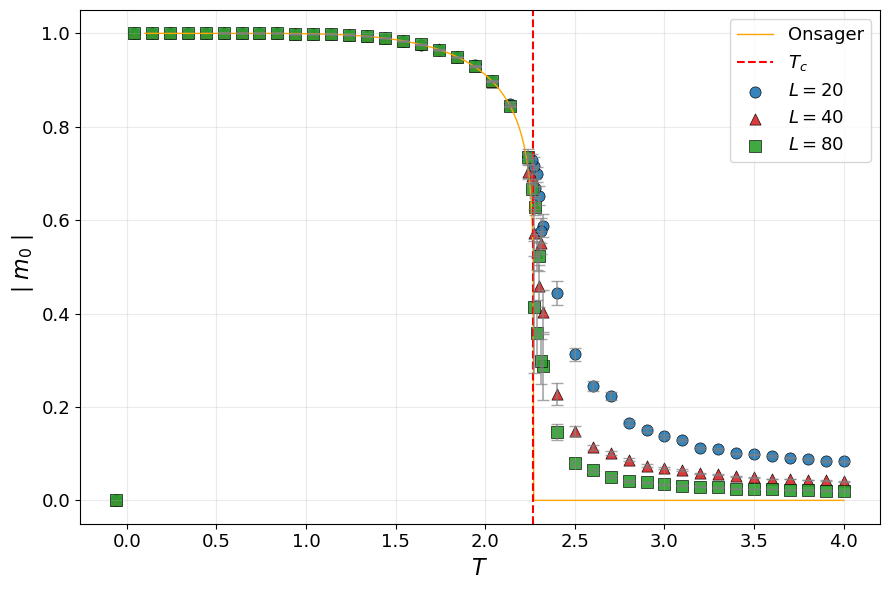

In [6]:
# Crear figura y ejes
fig, ax = plt.subplots(figsize=(9, 6))

# Paleta de colores suaves pero diferenciables (puedes ajustar)
colors = ['#1f77b4','#d62728', '#2ca02c']  # Azul, rojo, verde
markers = ['o', '^', 's']  # Círculo, triángulo, cuadrado

# Añadir la curva de Onsager y Tc
ax.plot(osanger_T, magnetization_ising_2d(osanger_T), '-', color='orange', linewidth=1, label="Onsager")
ax.axvline(Tc, linestyle='--', color='red', linewidth=1.5, label=r"$T_c$")

# Bucle sobre L = 20, 40, 80
for i, L in enumerate([20, 40, 80]):
    # Leer datos para cada L
    temperatura, magnetizacion, magnetizacion2, error, mc_tau, correlacion = leer_datos(f"Datos/L{L}/fort.66")
    magnetization_data = np.loadtxt(f"Datos/L{L}/fort.88")

    # Añadir bigotes de gato (errorbars)
    ax.errorbar(temperatura, magnetizacion, yerr=error, fmt='none',
                ecolor='gray', elinewidth=1.2, capsize=4, alpha=0.7)

    # Añadir puntos (scatter) sin cmap, con color fijo por L
    ax.scatter(temperatura, magnetizacion,
               color=colors[i], edgecolors='black', linewidths=0.5,
               s=65, alpha=0.9, marker=markers[i], label=fr"$L = {L}$")

# Estética final
ax.set_xlabel(r"$T$", fontsize=16)
ax.set_ylabel(r"$\mid m_0 \mid$", fontsize=16)
ax.tick_params(labelsize=13)
ax.grid(True, alpha=0.25)

# Crear leyenda automáticamente desde ax.scatter
ax.legend(fontsize=13)

# Guardar y mostrar
plt.tight_layout()
plt.savefig('grafico_mejorado_sin_cmap.png', dpi=300)
plt.show()

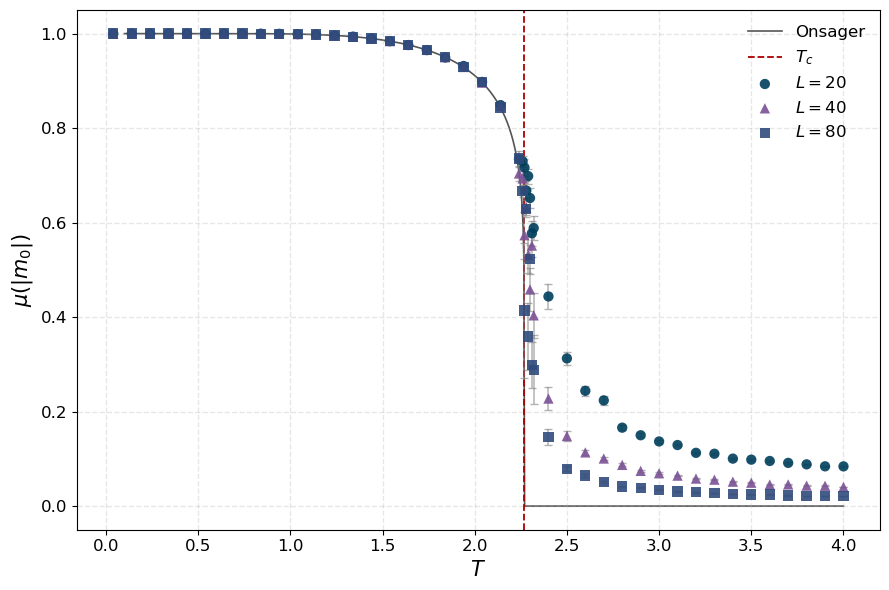

In [37]:
# Crear figura y ejes
fig, ax = plt.subplots(figsize=(9, 6))

# Paleta de colores sobrios y diferenciables
colors = ['#003f5c', '#7a5195', '#2f4b7c']  # Azul marino, burdeos, violeta grisáceo
markers = ['o', '^', 's']  # Círculo, triángulo, cuadrado

# Dibujar primero la curva de Onsager para que quede al fondo
ax.plot(osanger_T, magnetization_ising_2d(osanger_T), '-', color='#555555', linewidth=1.2, label="Onsager", zorder=1)

# Línea vertical para Tc
ax.axvline(Tc, linestyle='--', color='#aa0000', linewidth=1.3, label=r"$T_c$", zorder=2)

# Bucle sobre L = 20, 40, 80
for i, L in enumerate([20, 40, 80]):
    temperatura, magnetizacion, magnetizacion2, error, mc_tau, correlacion = leer_datos(f"Datos/L{L}/fort.66")
    magnetization_data = np.loadtxt(f"Datos/L{L}/fort.88")

    # Bigotes de gato
    ax.errorbar(temperatura, magnetizacion, yerr=error, fmt='none',
                ecolor='gray', elinewidth=1.1, capsize=3, alpha=0.6, zorder=3)

    # Puntos
    mask = temperatura > 0  # Se me coló una temperatura negativa en los datos y no la quiero
    ax.scatter(temperatura[mask], magnetizacion[mask],
               color=colors[i], edgecolors='none', s=55, alpha=0.9,
               marker=markers[i], label=fr"$L = {L}$", zorder=4)

# Estética general
ax.set_xlabel(r"$T$", fontsize=15)
ax.set_ylabel(r"$\mu(|m_0|)$", fontsize=15)
ax.tick_params(labelsize=12)
ax.grid(True, which='both', linestyle='--', linewidth=1, alpha=0.3)

# Leyenda sobria
ax.legend(fontsize=12, frameon=False)

# Ajustes finales
plt.tight_layout()
plt.savefig('grafico_sobrio.png', dpi=300)
plt.show()


Faltan los datos para L=160


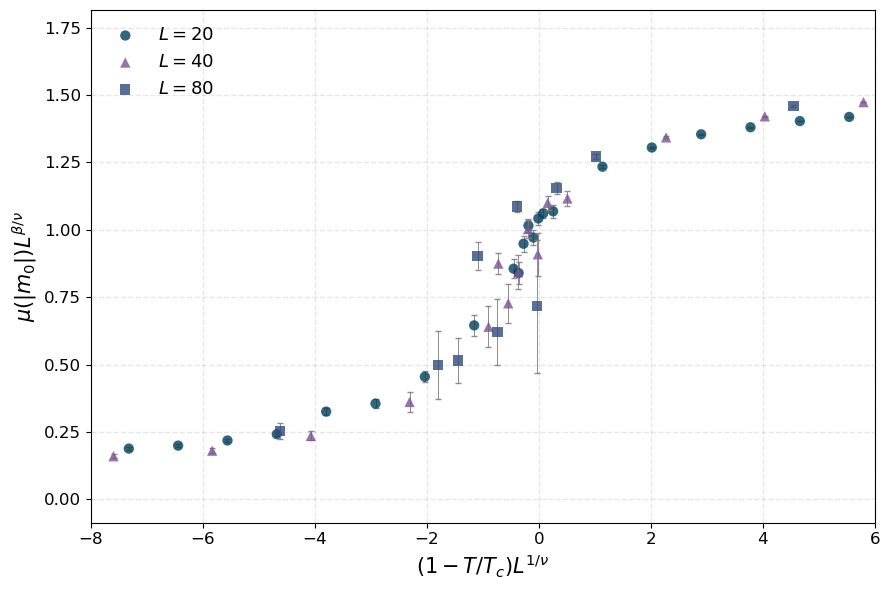

In [40]:
# Exponentes críticos de Ising 2D
beta_nu = 1/8
nu = 1.0

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(9, 6))

# Paleta de colores sobrios y diferenciables
colors = ['#003f5c', '#7a5195', '#2f4b7c', '#a61c1c']  # Azul marino, burdeos, violeta grisáceo, rojo
markers = ['o', '^', 's', 'D']  # Círculo, triángulo, cuadrado

# Bucle sobre L = 20, 40, 80, 160
for i, L in enumerate([20, 40, 80, 160]):
    try:
        temperatura, magnetizacion, magnetizacion2, error, mc_tau, correlacion = leer_datos(f"Datos/L{L}/fort.66")
        # magnetization_data = np.loadtxt(f"Datos/L{L}/fort.88") # Parece que no se usa

        # Variable de escalado de temperatura corregida
        t_rescalado = (1 - temperatura / Tc) * (L**(1/nu))

        # Rescalar la magnetización
        magnetizacion_rescalada = magnetizacion * (L**beta_nu)

        # Bigotes de gato (rescalados aproximadamente)
        error_rescalado = error * (L**beta_nu)

        ax.errorbar(t_rescalado, magnetizacion_rescalada, yerr=error_rescalado, fmt='none',
                    ecolor='gray', elinewidth=0.7, capsize=2, alpha=0.9, zorder=4)

        # Puntos rescalados
        ax.scatter(t_rescalado, magnetizacion_rescalada,
                color=colors[i], edgecolors='none', s=55, alpha=0.8,
                marker=markers[i], label=fr"$L = {L}$", zorder=4)
        
    except:
        print(f'Faltan los datos para L={L}')

# Estética general
ax.set_xlabel(r"$(1 - T/T_c) L^{1/\nu}$", fontsize=15)
ax.set_ylabel(r"$\mu(|m_0|) L^{\beta/\nu}$", fontsize=15)
ax.tick_params(labelsize=12)
ax.grid(True, which='both', linestyle='--', linewidth=1, alpha=0.3)

# Leyenda sobria
ax.legend(fontsize=13, frameon=False, loc=2)

# Ajustes finales
plt.xlim(-8,6)
plt.tight_layout()
plt.savefig('colapso_magnetizacion_corregido.png', dpi=300)
plt.show()